In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [7]:
cirrhosis_data_path = Path(r"C:\Users\Brand\project_env\Scikit-Learn-Fundamentals\SciKit-Data Science\data\Multi-Class Prediction of Cirrhosis Outcomes")
train_data_path = cirrhosis_data_path / "train.csv"
test_data_path = cirrhosis_data_path / "test.csv"

train_data = pd.read_csv(train_data_path, index_col=0)
test_data = pd.read_csv(test_data_path, index_col=0)

In [8]:
train_data.head(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

In [13]:
y = train_data["Status"]
X = train_data.drop(columns=["Status"])

In [17]:
categorical_data = X.select_dtypes("object")
numeric_data = X.select_dtypes("float")

In [19]:
categorical_data.head(10)

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
id,,,,,,
0,D-penicillamine,M,N,N,N,N
1,Placebo,F,N,N,N,N
2,Placebo,F,N,Y,Y,Y
3,Placebo,F,N,N,N,N
4,Placebo,F,N,Y,N,N
5,D-penicillamine,F,N,Y,N,N
6,Placebo,F,N,N,N,N
7,Placebo,F,N,Y,N,N
8,D-penicillamine,F,N,N,N,N


In [20]:
numeric_data.head(10)

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,
0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
5,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0
6,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0
7,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0
8,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0


<Axes: >

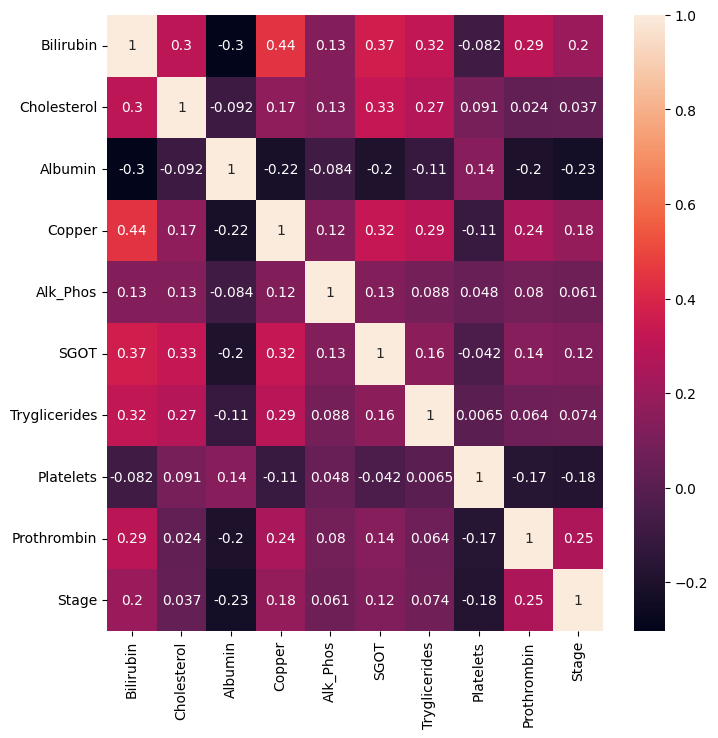

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)